<a href="https://colab.research.google.com/github/shila121/projects/blob/main/marketing_campaign_for_banking_products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Framing the Problem Statement
Here we are trying to predict which customers will buy the banking products or not.
Target variable is 'deposit'

# 2.Data Analysis
we will try to understand the data by following ways


1.   hypothesis testing
2.   univariate/bivariate analysis
3.   missing data
4.   numerical data
5.   outliers
7.   categorical data







# Step 1:Hypothesis testing

In [1]:
# import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import dataset
data = pd.read_csv('bank.csv')
print('data visualization')
print(data.head())
print(data.columns,len(data.columns))
print(data.shape)
print('*'*80)

# get the categorical columns from the data
catCols = data.select_dtypes('object').columns
print('categorical columns',catCols,len(catCols))
print('*'*80)

# get numerical columns from the data
numCols = data.select_dtypes('number').columns
print('numeric columns',numCols,len(numCols))
print('*'*80)

print(data['deposit'].unique())
# change the deposit column to numeric value
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['deposit'] =le.fit_transform(data['deposit'])
print(data['deposit'].unique())



data visualization
   age         job  marital  education  ... pdays  previous poutcome deposit
0   59      admin.  married  secondary  ...    -1         0  unknown     yes
1   56      admin.  married  secondary  ...    -1         0  unknown     yes
2   41  technician  married  secondary  ...    -1         0  unknown     yes
3   55    services  married  secondary  ...    -1         0  unknown     yes
4   54      admin.  married   tertiary  ...    -1         0  unknown     yes

[5 rows x 17 columns]
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object') 17
(11162, 17)
********************************************************************************
categorical columns Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object') 10
******************

In [2]:
# we will carry out z-test on the numerical columns to know their impact
from statsmodels.stats import weightstats as stests

significant_numCols,in_significant_numCols = [],[]

for i in numCols:
  p_val = stests.ztest(data[i],data.deposit)
  p_val = p_val[1]
  print('column:',i,'p_val:',p_val)
  if p_val < 0.05:
    status = "Reject Null Hypothesis,Significant predictor"
    print('status',status)
    print('*'*80)
    significant_numCols.append(i)
  else:
    status = 'Accept Null Hypothesis,Insignificant predictor'
    print('status',status)
    in_significant_numCols.append(i)
    print('*'*80)

print('significant numeric columns:',significant_numCols,len(significant_numCols))
print('in_significant numeric columns:',in_significant_numCols,len(in_significant_numCols))

column: age p_val: 0.0
status Reject Null Hypothesis,Significant predictor
********************************************************************************
column: balance p_val: 0.0
status Reject Null Hypothesis,Significant predictor
********************************************************************************
column: day p_val: 0.0
status Reject Null Hypothesis,Significant predictor
********************************************************************************
column: duration p_val: 0.0
status Reject Null Hypothesis,Significant predictor
********************************************************************************
column: campaign p_val: 0.0
status Reject Null Hypothesis,Significant predictor
********************************************************************************
column: pdays p_val: 0.0
status Reject Null Hypothesis,Significant predictor
********************************************************************************
column: previous p_val: 1.0279444227850059e-58
s

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# wew will carry out chi-square test on categorical columns to know the significance

significant_catCols,in_significant_catCols = [],[]

from scipy.stats import chi2_contingency

for i in catCols:
  if i != 'deposit':
    stat,p_val,dof,ex = chi2_contingency(pd.crosstab(data[i],data.deposit))
    print('column:',i,',p_val:',p_val)
    if p_val < 0.05:
      status = "Reject Null Hypothesis,Significant predictor"
      print('status',status)
      print('*'*80)
      significant_catCols.append(i)
    else:
      status = 'Accept Null Hypothesis,Insignificant predictor'
      print('status',status)
      in_significant_catCols.append(i)
      print('*'*80)

print('significant categorical columns:',significant_catCols,len(significant_catCols))
print('in_significant categorical columns:',in_significant_catCols,len(in_significant_catCols))


column: job ,p_val: 2.741689587081072e-74
status Reject Null Hypothesis,Significant predictor
********************************************************************************
column: marital ,p_val: 1.600576988089358e-24
status Reject Null Hypothesis,Significant predictor
********************************************************************************
column: education ,p_val: 1.9534186354212715e-26
status Reject Null Hypothesis,Significant predictor
********************************************************************************
column: default ,p_val: 2.4428001791928345e-05
status Reject Null Hypothesis,Significant predictor
********************************************************************************
column: housing ,p_val: 9.724394114495535e-103
status Reject Null Hypothesis,Significant predictor
********************************************************************************
column: loan ,p_val: 2.171286879630289e-31
status Reject Null Hypothesis,Significant predictor
*********

# Step 2:Univariate/Bivariate analysis

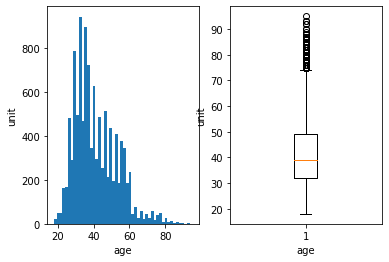

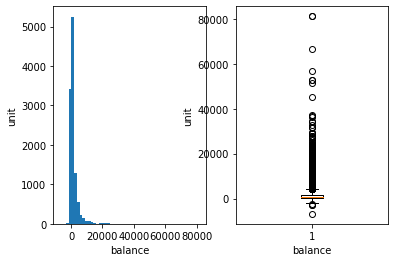

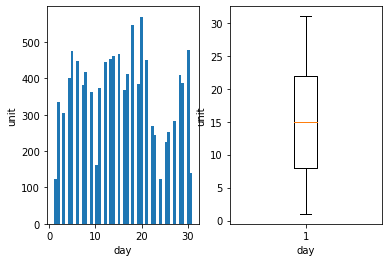

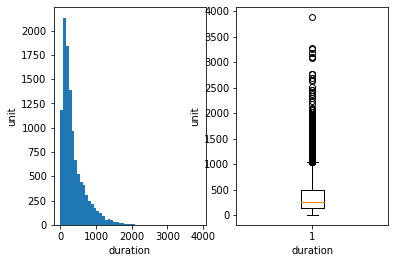

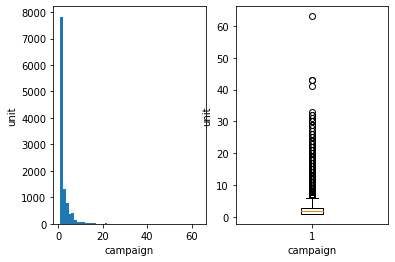

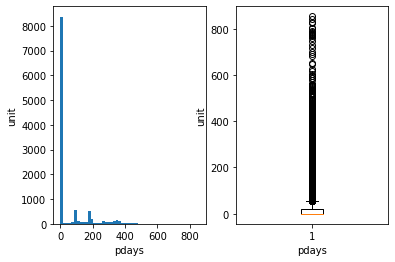

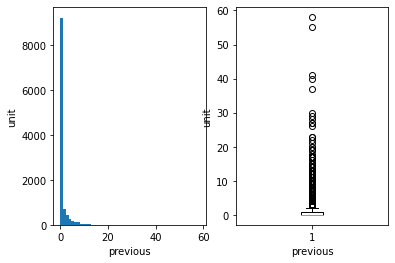

In [4]:
# univariate analysis of numeric columns with histogram and boxplot

for i in numCols:
  plt.subplot(1,2,1)
  plt.hist(data[i],bins =50)
  plt.xlabel(i)
  plt.ylabel('unit')

  plt.subplot(1,2,2)
  plt.boxplot(data[i])
  plt.xlabel(i)
  plt.ylabel('unit')

  plt.show()




In [5]:
# noted that outliers are present in the data

# univariate analysis of categorical columns with value counts

for i in catCols:
  print('column:',i)
  print(data[i].value_counts())
  print('*'*80)


column: job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64
********************************************************************************
column: marital
married     6351
single      3518
divorced    1293
Name: marital, dtype: int64
********************************************************************************
column: education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64
********************************************************************************
column: default
no     10994
yes      168
Name: default, dtype: int64
********************************************************************************
column: housing
no     5881
yes    5281
Name: housing, dtype: int64
***********************

               age   balance       day  ...     pdays  previous   deposit
age       1.000000  0.112300 -0.000762  ...  0.002774  0.020169  0.034901
balance   0.112300  1.000000  0.010467  ...  0.017411  0.030805  0.081129
day      -0.000762  0.010467  1.000000  ... -0.077232 -0.058981 -0.056326
duration  0.000189  0.022436 -0.018511  ... -0.027392 -0.026716  0.451919
campaign -0.005278 -0.013894  0.137007  ... -0.102726 -0.049699 -0.128081
pdays     0.002774  0.017411 -0.077232  ...  1.000000  0.507272  0.151593
previous  0.020169  0.030805 -0.058981  ...  0.507272  1.000000  0.139867
deposit   0.034901  0.081129 -0.056326  ...  0.151593  0.139867  1.000000

[8 rows x 8 columns]


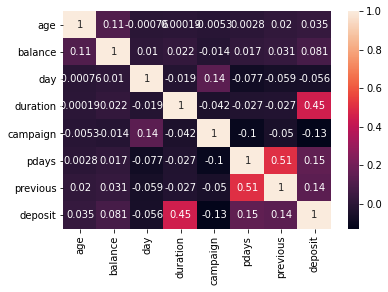

In [6]:
# Bi-variate analysis of numeric data by Co-relation matrix
import seaborn as sns
matrix = data.corr()
print(matrix)

sns.heatmap(matrix,annot = True)


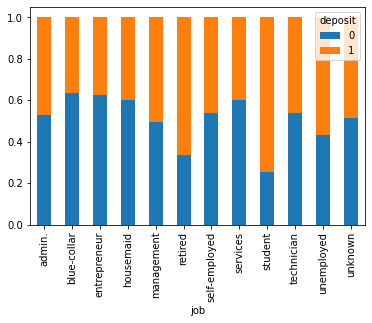

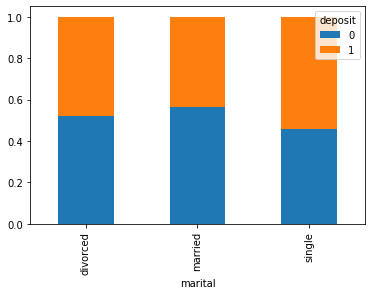

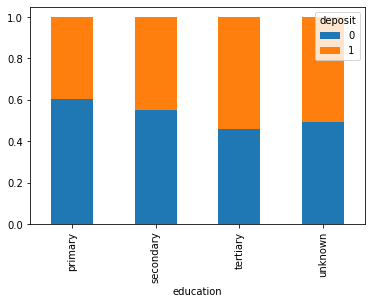

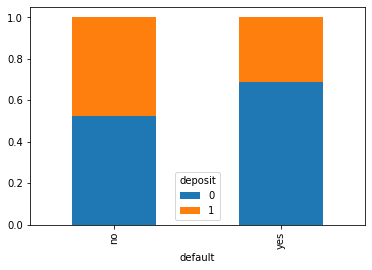

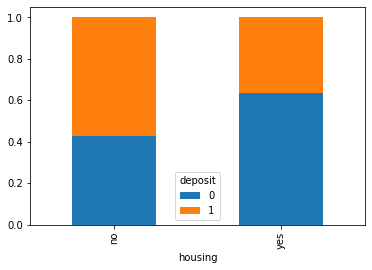

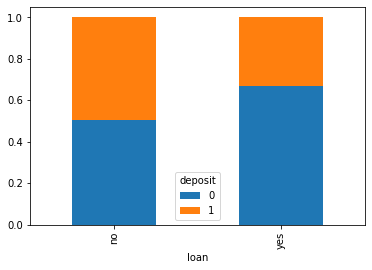

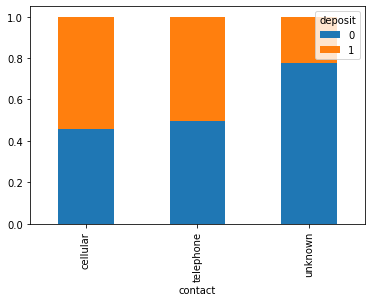

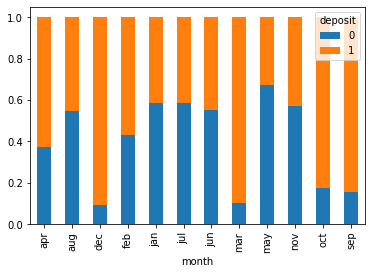

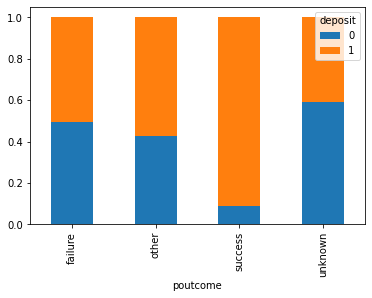

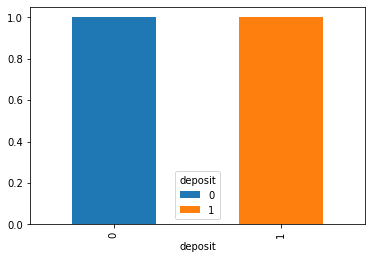

In [7]:
# Bi-variate analysis of categorical columns

for i in catCols:
  category = pd.crosstab(data[i],data['deposit'])
  category.div(category.sum(1).astype(float),axis =0 ).plot(kind = 'bar',stacked = True)
  plt.show()



# Step 3:Missing Value 

In [8]:
# lets analyse if there is any missing values
print(data.isnull().sum())

# luckily no missing data

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


# Step 4:Numerical data analysis

In [17]:
print('numerical columns:',numCols,len(numCols))

# ->1. visualize numerical data
print(data[numCols].head())
print('*'*80)

# ->2. make a list of discrete numerical columns
discrete_numCols = [var for var in numCols if len(data[var].unique())<20]
print('dicrete numerical columns:',discrete_numCols,len(discrete_numCols))
print('*'*80)

# ->3.make a list of discrete numerical columns
continuous_numCols = [var for var in numCols if len(data[var].unique())>20]
print('continuous numerical columns:',continuous_numCols,len(continuous_numCols))
print('*'*80)

# ->4.visualize the continuous numerical columns
print(data[continuous_numCols].head())
print('*'*80)

numerical columns: Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object') 7
   age  balance  day  duration  campaign  pdays  previous
0   59     2343    5      1042         1     -1         0
1   56       45    5      1467         1     -1         0
2   41     1270    5      1389         1     -1         0
3   55     2476    5       579         1     -1         0
4   54      184    5       673         2     -1         0
********************************************************************************
dicrete numerical columns: [] 0
********************************************************************************
continuous numerical columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'] 7
********************************************************************************
   age  balance  day  duration  campaign  pdays  previous
0   59     2343    5      1042         1     -1         0
1   56       45    5      1467         1   

# Step 5.Outliers Analysis


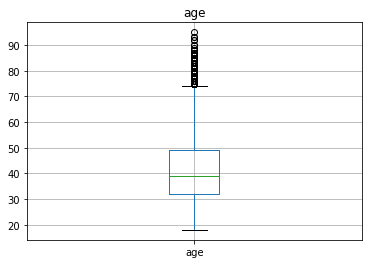

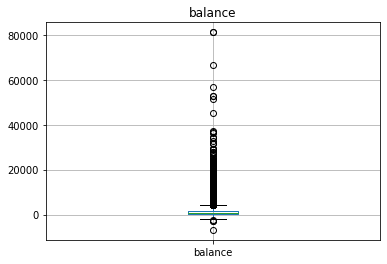

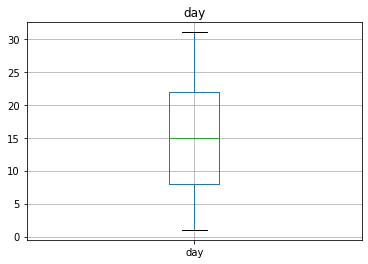

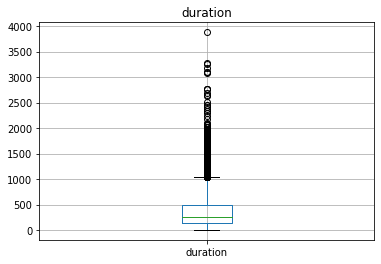

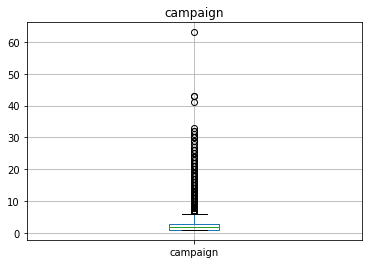

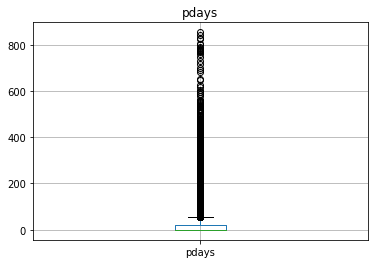

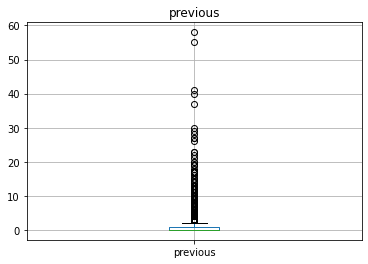

In [18]:
def find_outliers(df,var):
  df = df.copy()
  df.boxplot(column = var)
  plt.title(var)
  plt.show()


for i in continuous_numCols:
  find_outliers(data,i)


# Step 6:Categorical data analysis

In [21]:
# ->1.visualize the categorical data
print('categorical columns:',catCols,len(catCols))
print('-'*60)
print(data[catCols].head())
print('-'*60)

# ->2.cardinality of the categorical data
print(data[catCols].nunique())
print('-'*60)

# ->3 analyse rare labels
def analyse_rare_vars(df,var,rare_percentage):
  df = df.copy()
  tmp = df.groupby(var)['deposit'].count()/len(df)
  return tmp[tmp < rare_percentage]

for i in catCols:
  print(analyse_rare_vars(data,i,0.01)) #here we,consider rare percent as 1%
  print()


categorical columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object') 10
------------------------------------------------------------
          job  marital  education default  ...  contact month poutcome deposit
0      admin.  married  secondary      no  ...  unknown   may  unknown       1
1      admin.  married  secondary      no  ...  unknown   may  unknown       1
2  technician  married  secondary      no  ...  unknown   may  unknown       1
3    services  married  secondary      no  ...  unknown   may  unknown       1
4      admin.  married   tertiary      no  ...  unknown   may  unknown       1

[5 rows x 10 columns]
------------------------------------------------------------
job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
deposit       2
dtype: int64
-------------------------------------------

# 3.Feature Engineering
Here,we will deal with all the problems like

1.   train_test split
2.   missing value treatment
3.   outlier treatment
4.   rare category treatment
5.   caterical data encoding
6.   feature scaling
7.   feature selection
















In [22]:
# ->1. Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,data['deposit'],random_state =0,test_size = 0.2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(8929, 17) (2233, 17) (8929,) (2233,)


In [23]:
# ->2. missing value treatmnet

# get the categorical columns with na values
# no missing data so skipping this step

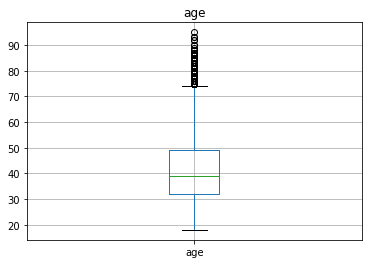

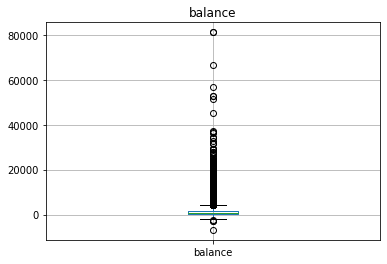

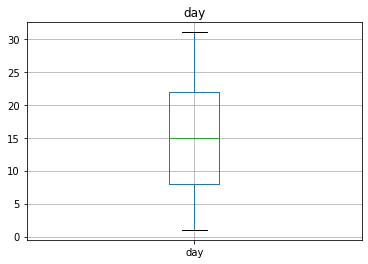

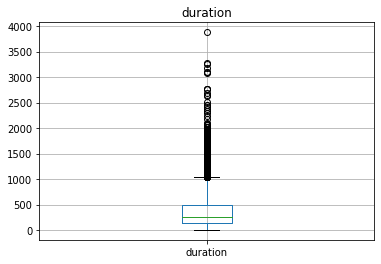

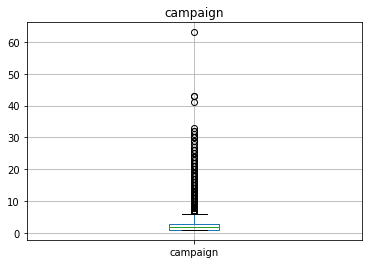

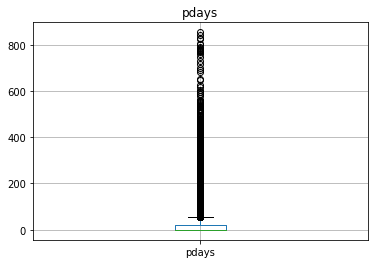

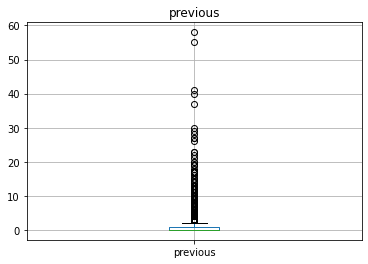

In [24]:
# -> 3. handling outliers


for var in continuous_numCols:
  find_outliers(data,var)

In [25]:
# ->handling rare labels

print('categorical columns:',catCols,len(catCols))

categorical columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object') 10


In [26]:
cat_vars = [var for var in X_train.columns if X_train[var].dtype == 'O']

def find_frequent_labels(df,var,rare_percent):
  df = df.copy()
  tmp = df.groupby(var)['deposit'].count()/len(df)
  return tmp[tmp>rare_percent].index

print('categorical variables:',cat_vars,len(cat_vars))

for var in cat_vars:

  # find the frequent categories
  frequent_ls = find_frequent_labels(X_train,var,0.01)

  # replace rarecategorical columns with 'Rare' labels
  X_train[var] = np.where(X_train[var].isin(frequent_ls),X_train[var],'Rare')

  X_test[var] = np.where(X_test[var].isin(frequent_ls),X_test[var],'Rare')

categorical variables: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'] 9


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [28]:
# ->6.Encoding categorical variables

def replace_categories(train,test,var,target):

  ordered_labels = train.groupby([var])[target].mean().sort_values().index

  ordinal_label ={k:i for i,k in enumerate(ordered_labels,0)}

  train[var] = train[var].map(ordinal_label)
  test[var] = test[var].map(ordinal_label)

for var in cat_vars:
  replace_categories(X_train, X_test, var, 'deposit')

print(X_train.shape,X_test.shape)
print(X_train.head())

(8929, 17) (2233, 17)
      age  job  marital  education  ...  pdays  previous  poutcome  deposit
6111   49    8        0          1  ...     -1         0         0        0
1149   59   10        1          1  ...     -1         0         0        1
2954   33    0        0          0  ...     -1         0         0        1
2458   58    9        0          1  ...     99         2         3        1
7504   33    5        0          1  ...    374         3         2        0

[5 rows x 17 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [29]:
# ->7 Feature scaling
train_vars = [var for var in X_train.columns if var not in ['deposit']]
print(train_vars,len(train_vars))

# import the scale
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

scaler.fit(X_train[train_vars])

# transform the train and test set
X_train[train_vars] = scaler.transform(X_train[train_vars])

X_test[train_vars] = scaler.transform(X_test[train_vars])

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome'] 16


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [30]:
# ->7. feature selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
print(X_train.head())

y_train = X_train['deposit']
y_test = X_test['deposit']

# drop unnecessary variables from our training and testing sets
X_train.drop(['deposit'], axis=1, inplace=True)
X_test.drop(['deposit'], axis=1, inplace=True)

# remember to set the seed, the random state in this function
sel_ = SelectFromModel(Lasso(alpha=0.005, random_state=0))

# train Lasso model and select features
sel_.fit(X_train, y_train)

           age  job  marital  education  ...     pdays  previous  poutcome  deposit
6111  0.588235  0.6      0.0        0.0  ...  0.000000       0.0       0.0        0
1149  1.176471  1.0      0.5        0.0  ...  0.000000       0.0       0.0        1
2954 -0.352941 -1.0      0.0       -0.5  ...  0.000000       0.0       0.0        1
2458  1.117647  0.8      0.0        0.0  ...  2.325581       2.0       3.0        1
7504 -0.352941  0.0      0.0        0.0  ...  8.720930       3.0       2.0        0

[5 rows x 17 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [31]:
sel_.get_support()

array([False,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True])

In [32]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feats = X_train.columns[(sel_.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feats)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 16
selected features: 13
features with coefficients shrank to zero: 3


In [33]:
# print the selected features
selected_feats

Index(['job', 'marital', 'education', 'balance', 'housing', 'loan', 'contact',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome'],
      dtype='object')

# Checking which model will perform better

In [34]:
# we will evaluate different machine learning classification models 
from sklearn.model_selection import cross_val_score


# 1- Logistic Regression
# 2- K-nearest neighbors classification
# 3- support vector machine
# 4- naive bayes
# 5- random forest classification
# -----------------------------------
# Function to calculate mean absolute error

def cross_val(X_train,X_test,model):
  accuracies = cross_val_score(estimator = model,X=X_train,y=y_train,cv=5)
  return accuracies.mean()


def fit_and_evaluate(model):

  # train the model
  model.fit(X_train,y_train)

  model_pred = model.predict(X_test)
  model_cross = cross_val(X_train,y_train,model)
  return model_cross

# Evaluating various models
# ----------------------------------------

from sklearn import model_selection
from numpy import abs
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
models = []
names = []
score = []

models.append(('Logistic Regression',LogisticRegression()))
models.append(('Linear svc',LinearSVC()))
models.append(('Random forest classifier',RandomForestClassifier()))
models.append(('knn ',KNeighborsClassifier()))
models.append(('Guassian NB ',GaussianNB()))
models.append(('Decision TreeClassifier',DecisionTreeClassifier()))
models.append(("xg booster",XGBClassifier()))

for name,model in models:
  # print('Name:',name)
  logr_cross = fit_and_evaluate(model)
  print("Name:",name,',Cross Validation Score = %0.4f' % logr_cross)
  score.append(logr_cross)


Name: Logistic Regression ,Cross Validation Score = 0.8142


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Name: Linear svc ,Cross Validation Score = 0.8115
Name: Random forest classifier ,Cross Validation Score = 0.8545
Name: knn  ,Cross Validation Score = 0.7946
Name: Guassian NB  ,Cross Validation Score = 0.7640
Name: Decision TreeClassifier ,Cross Validation Score = 0.7818
Name: xg booster ,Cross Validation Score = 0.8470


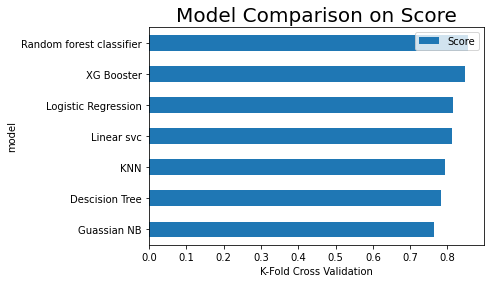

In [41]:
model_comparison = pd.DataFrame({'model':['Logistic Regression','Linear svc','Random forest classifier','KNN','Guassian NB','Descision Tree','XG Booster'],'Score':score})

# horizontal bar  chart
model_comparison.sort_values('Score',ascending=True).plot(x = 'model', y = 'Score', kind = 'barh')
plt.xlabel('K-Fold Cross Validation')
plt.title('Model Comparison on Score', size = 20);
plt.show()

# # Model selected:Random forest classifier

In [67]:
n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 15, num = 10)] # returns 10 numbers 
max_features = ['auto', 'log2']
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)] 
max_depth.append(None)
bootstrap = [True, False]

r_grid = {'n_estimators': n_estimators,

               'max_features': max_features,

               'max_depth': max_depth,

               'bootstrap': bootstrap}

print(r_grid)
rfr = RandomForestClassifier(random_state = 1)

{'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15], 'max_features': ['auto', 'log2'], 'max_depth': [5, 10, None], 'bootstrap': [True, False]}


In [68]:
# Fit on the traing model
rfr_random = RandomizedSearchCV(estimator=rfr, param_distributions=r_grid, n_iter = 20, scoring='neg_mean_absolute_error', cv = 3, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)

rfr_random.fit(X_train, y_train);


# result = search.fit(X, y)
# # summarize result
# print('Best Score: %s' % result.best_score_)
# print('Best Hyperparameters: %s' % result.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    5.5s finished


In [70]:
print(rfr_random.best_params_)

{'n_estimators': 15, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}


In [72]:
print(rfr_random.score(X_test , y_test))

-0.16032243618450515


In [75]:
random_forest = RandomForestClassifier(n_estimators= 15, max_features= 'auto', max_depth=10, bootstrap= False)
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

90.32

In [76]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,Y_pred)
print(cm)
print(accuracy_score(y_test,Y_pred))

[[994 211]
 [144 884]]
0.8410210479175997


In [77]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1205
           1       0.81      0.86      0.83      1028

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233

